# **DFMC Model:** functions

In [1]:
import numpy as np
import DFMC_model
from matplotlib import cm
import matplotlib.colors as mcolors
import matplotlib as mpl
import matplotlib.pyplot as plt

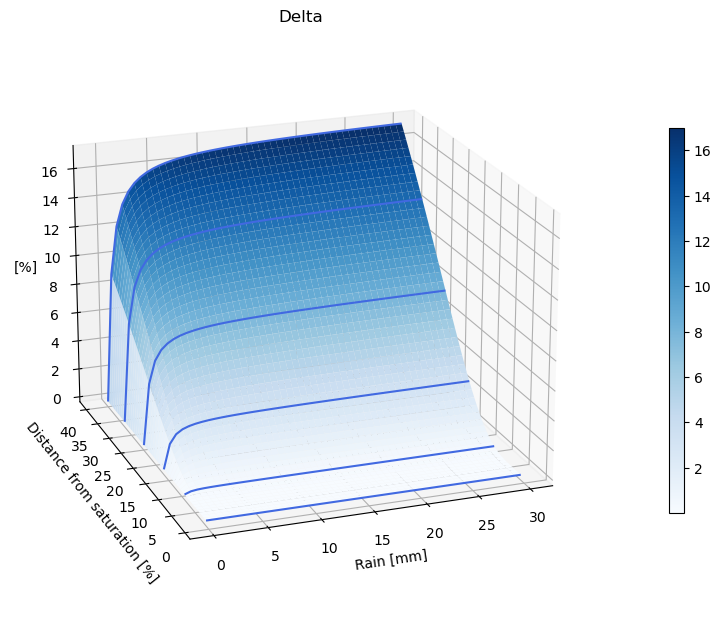

In [2]:
# DELTA
sats = np.linspace(1, 40)
rains = np.linspace(0.001, 30)
rains_grid, sets_grid = np.meshgrid(rains, sats)

delta = DFMC_model.delta_rain(rain=rains_grid, moisture=0, saturation=sets_grid)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(rains_grid, sets_grid, delta,
                       cmap=cm.Blues,
                       linewidth=0,
                       alpha=1)
cset = ax.plot_wireframe(rains_grid, sets_grid, delta, rstride=10, cstride=0, color='royalblue')
fig.colorbar(surf, shrink=0.5, aspect=25, pad=0.1)
ax.set_title('Delta')
ax.set_xlabel('Rain [mm]')
ax.set_ylabel('Distance from saturation [%]')
ax.set_zlabel('[%]')
ax.view_init(elev=20, azim=250)
plt.show()

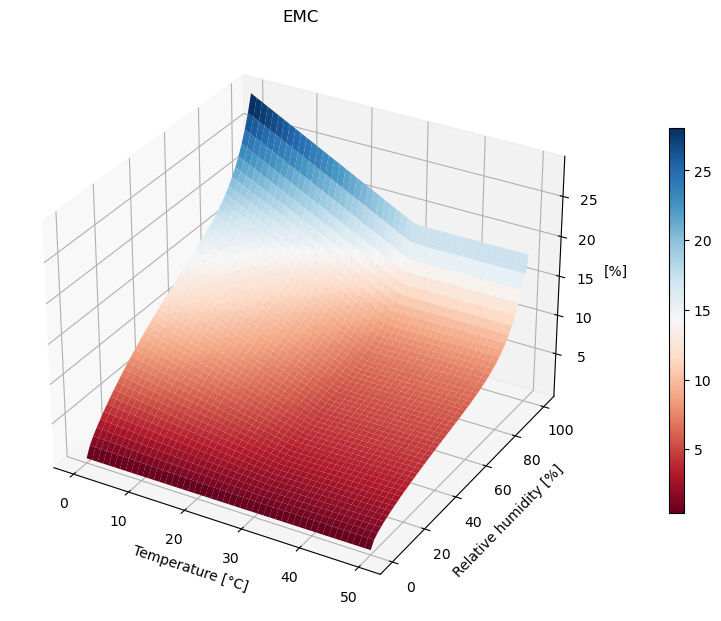

In [3]:
# EMC
temp = np.linspace(0, 50)
hum = np.linspace(0, 100)
temp_grid, hum_grid = np.meshgrid(temp, hum)

emc = DFMC_model.EMC(hum=hum_grid, temp=temp_grid)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(temp_grid, hum_grid, emc,
                       cmap=cm.RdBu,
                       linewidth=0,
                       alpha=1)
fig.colorbar(surf, shrink=0.5, aspect=25, pad=0.1)
ax.set_title('EMC')
ax.set_xlabel('Temperature [°C]')
ax.set_ylabel('Relative humidity [%]')
ax.set_zlabel('[%]')
# ax.view_init(elev=15, azim=280)
plt.show()

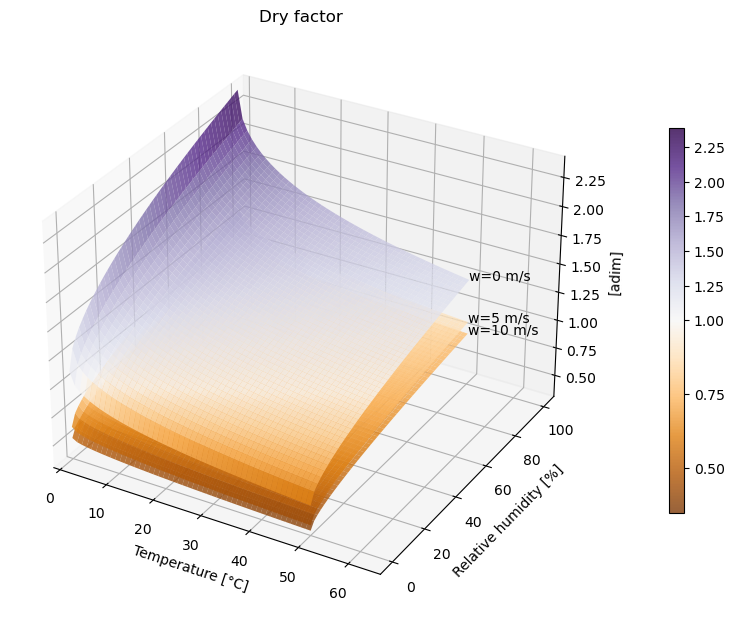

In [4]:
# dry factor (K dry with T0=1h)
temp = np.linspace(0, 50)
hum = np.linspace(0, 100)
winds = np.array([0, 5, 10])
temp_grid, hum_grid = np.meshgrid(temp, hum)

Kdry = np.zeros((temp_grid.shape[0], temp_grid.shape[1], winds.shape[0]))
for ii, ww in enumerate(winds):
    Kdry[:, :, ii] = DFMC_model.K_dry(T0=1, temp=temp_grid, wspeed=ww, hum=hum_grid)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
norm = mcolors.TwoSlopeNorm(vmin=Kdry.min(),
                            vcenter=1,
                            vmax=Kdry.max())
for ii, ww in enumerate(winds):
    temp_pp = temp.max()
    hum_pp = hum.max()
    idx_x = np.argwhere(temp==temp_pp)[0][0]
    idx_y = np.argwhere(hum==hum_pp)[0][0]
    surf = ax.plot_surface(temp_grid, hum_grid, Kdry[:, :, ii],
                           cmap=cm.PuOr,
                           norm=norm,
                           linewidth=0,
                           alpha=0.8)
    ax.text(temp_pp, hum_pp, Kdry[idx_x, idx_y, ii], f'w={ww} m/s')
fig.colorbar(surf, shrink=0.5, aspect=25, pad=0.1)
ax.set_xlim([0, 65])
ax.set_title('Dry factor')
ax.set_xlabel('Temperature [°C]')
ax.set_ylabel('Relative humidity [%]')
ax.set_zlabel('[adim]')
# ax.view_init(elev=15, azim=280)
plt.show()

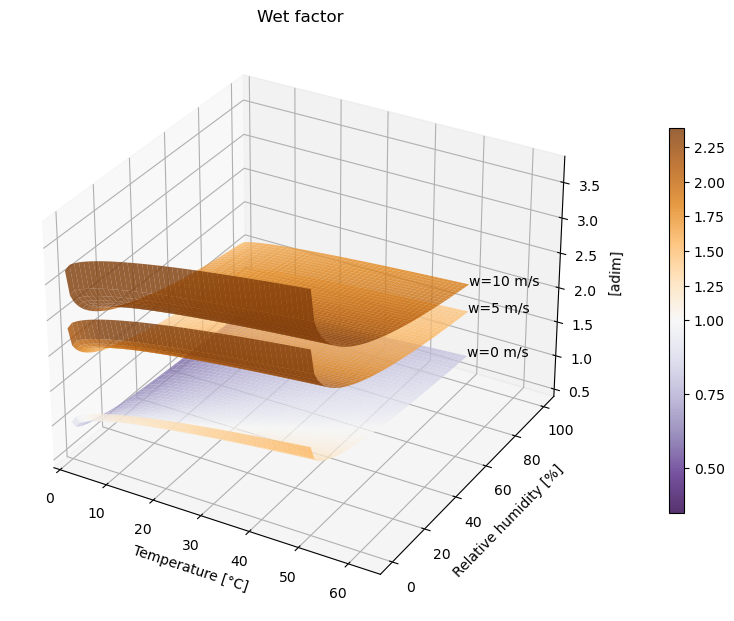

In [5]:
# wet factor (K wet with T0=1h)
temp = np.linspace(0, 50)
hum = np.linspace(0, 100)
winds = np.array([0, 5, 10])
temp_grid, hum_grid = np.meshgrid(temp, hum)

Kwet = np.zeros((temp_grid.shape[0], temp_grid.shape[1], winds.shape[0]))
for ii, ww in enumerate(winds):
    Kwet[:, :, ii] = DFMC_model.K_wet(T0=1, temp=temp_grid, wspeed=ww, hum=hum_grid)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
norm = mcolors.TwoSlopeNorm(vmin=Kdry.min(),
                            vcenter=1,
                            vmax=Kdry.max())
for ii, ww in enumerate(winds):
    temp_pp = temp.max()
    hum_pp = hum.max()
    idx_x = np.argwhere(temp==temp_pp)[0][0]
    idx_y = np.argwhere(hum==hum_pp)[0][0]
    surf = ax.plot_surface(temp_grid, hum_grid, Kwet[:, :, ii],
                           cmap=cm.PuOr_r,
                           norm=norm,
                           linewidth=0,
                           alpha=0.8)
    ax.text(temp_pp, hum_pp, Kwet[idx_x, idx_y, ii], f'w={ww} m/s')
fig.colorbar(surf, shrink=0.5, aspect=25, pad=0.1)
ax.set_xlim([0, 65])
ax.set_title('Wet factor')
ax.set_xlabel('Temperature [°C]')
ax.set_ylabel('Relative humidity [%]')
ax.set_zlabel('[adim]')
plt.show()